In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import fsolve
from scipy.fft import fft


In [3]:
FEMTO = '../../../data/10FEMTO/raw_data/Validation_set/'
LEN = 2560

355
The solution for τ is: 0.02088411250121484


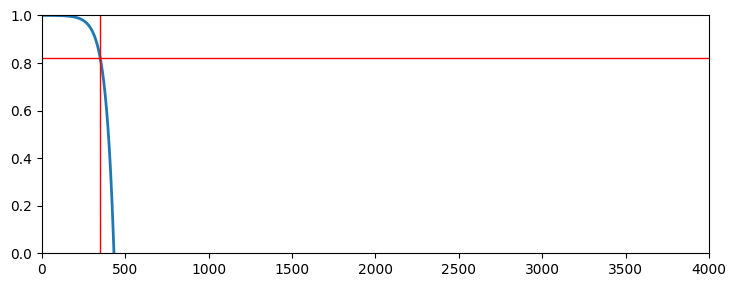

In [43]:
accs = os.listdir(FEMTO+'Bearing3_3')
accs.sort()
accs = [acc for acc in accs if acc.startswith('acc')]
life = len(accs)
print(int(life * 0.82))
def equation(tau, a, T):
    return 1 + np.exp(a) - np.exp((T * tau) + a)

initial_guess = 0
a = 1
T = 15
result = fsolve(equation, initial_guess, args=(a, T))
tau = result[0]
print(f"The solution for τ is: {tau}")
def HI(t):
    return 1 + np.exp(a) - np.exp((t * tau) + a)

rul = [i for i in range(life)]
hi_y = list(map(HI, rul))
min_value = min(hi_y)
max_value = max(hi_y)
normalized_values = [(x - min_value) / (max_value - min_value) for x in hi_y]

plt.figure(figsize=(8.61, 3.09))
plt.xlim(0, 4000)
plt.ylim(0.0, 1.0)
plt.plot(normalized_values, linewidth=2)
plt.axvline(x=life*0.8, color='r', linewidth=1)
plt.axhline(y=0.82, color='r', linewidth=1)
plt.show()

In [59]:
def equation(tau, a, t1, t2):
    eq1 = 0 + np.exp(a) - np.exp(t1 * tau + a)
    eq2 = -0.2 + np.exp(a) - np.exp(t2 * tau + a)
    return [eq1, eq2]

# Initial guess for a and tua
initial_guess = 0
t1 = 2800
t2 = 2300
# Solve the equations
solution = fsolve(equation, initial_guess, args=(a, t1, t2))
print(solution)
# Extracting the solutions for a and tua
a_solution, tua_solution = solution

print("Solution:")
print("a =", a_solution)
print("tua =", tua_solution)

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [51]:
import sympy as sp

# Define the variables
a, tua = sp.symbols('a tua')

# Given equations
eq1 = 1 + sp.exp(a) - sp.exp(2800 * tua + a) - 1
eq2 = 1 + sp.exp(a) - sp.exp(2300 * tua + a) - 0.8

# Solve the system of equations
solutions = sp.solve((eq1, eq2), (a, tua))

# Extract the value of 'a'
print(solutions)

# print(f"The value of 'a' is approximately: {a_value:.4f}")

[]


Solution:
a = 0.0
tau = 0.0


/home/kai/anaconda3/envs/nlp/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/kai/anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


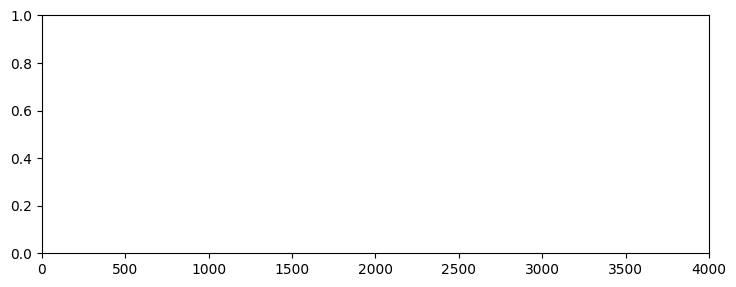

In [60]:
from scipy.optimize import fsolve
import numpy as np

def equations(vars):
    a, tau = vars
    constant = 2800 * tau if a > 0 else 2300 * tau
    eq1 = 0 + np.exp(a) - np.exp(constant - a)
    eq2 = -0.2 + np.exp(a) - np.exp(constant - a)

    return [eq1, eq2]

# Initial guess for the variables
initial_guess = [0, 0.0031326168751822274]

# Solve the equations
solution = fsolve(equations, initial_guess)

a_solution, tau_solution = solution
print("Solution:")
print("a =", a_solution)
print("tau =", tau_solution)
def HI(t):
    return 1 + np.exp(a_solution) - np.exp((t * tau_solution) + a_solution)

rul = [i for i in range(life)]
hi_y = list(map(HI, rul))
min_value = min(hi_y)
max_value = max(hi_y)
normalized_values = [(x - min_value) / (max_value - min_value) for x in hi_y]
plt.figure(figsize=(8.61, 3.09))
plt.xlim(0, 4000)
plt.ylim(0.0, 1.0)
plt.plot(normalized_values, linewidth=2)
plt.show()

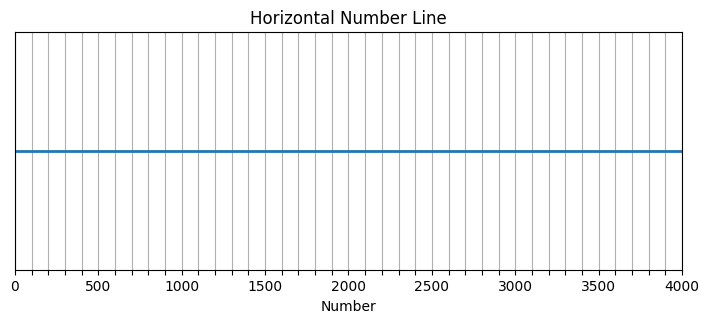

In [42]:
plt.figure(figsize=(8.61, 3.09))
plt.hlines(0, 0, 4000, linewidth=2)  # Plot the horizontal line from 0 to 4000

# Customize ticks
plt.xticks(np.arange(0, 4100, 100), [str(i) if i % 500 == 0 else '' for i in range(0, 4100, 100)])  # Set ticks at intervals of 100 with custom labels every 500 units
plt.yticks([])  # Hide y-axis ticks
plt.xlim(0, 4000)  # Set the x-axis limits

# Set labels and title
plt.xlabel('Number')
plt.title('Horizontal Number Line')

plt.grid(True)
plt.show()

In [7]:
y_windows = []
for i in range(life - 40):
    y_window = np.array(normalized_values)[i + 40]
    y_windows.append(y_window)


IndexError: index 871 is out of bounds for axis 0 with size 871

In [ ]:
print(y_windows[780])

0.7911853865419213


In [ ]:
len(y_windows)

831

In [ ]:
np.array(y_windows)

(831,)

In [ ]:
t_list = [100, 10, 100, 40]

In [ ]:
x = pd.read_csv(f'{FEMTO}/Bearing1_1/{accs[2800]}',header=None,sep=',', usecols=[4])
x_abs = x.abs()
x_avg = x.sum() / LEN
mean_square_mean = ((x.apply(lambda x: x - x_avg)) ** 2).sum()
p1 = x.min()
print(p1)
p2 = x.max()
print(p2)
p3 = x_abs.max()
print(p3)
p4 = p2 - p1
print(p4)
p5 = x_abs.sum() / LEN
print(p5)
p6 = (x_abs.sum() ** 0.5 / LEN) * 2
print(p6)
p7 = mean_square_mean / (LEN -1)
print(p7)
p8 = (mean_square_mean / LEN) ** 0.5
print(p8)
p9 = ((x ** 2).sum() / LEN) ** 0.5
print(p9)
p10 = ((x.apply(lambda x: x - x_avg)) ** 3).sum() / ((LEN - 1) * (p8 ** 3))
p10_new = ((x.apply(lambda x: x - x_avg)) ** 4).sum() / ((LEN - 1) * (mean_square_mean ** 2))
print('p10', p10)
p11 = (LEN * p9) / x_abs.sum()
print(p11)
p12 = p9 / p5
print(p12)
p13 = p3 / p9
print(p13)
p14 = p3 / p5
print(p14)
p15 = p3 / p6
print(p15)
p16 = p3 / (p9 ** 2)
print(p16)
# p6 = ( / LEN).apply()

4   -38.767
dtype: float64
4    30.043
dtype: float64
4    38.767
dtype: float64
4    68.81
dtype: float64
4    3.430638
dtype: float64
4    0.073215
dtype: float64
4    0.00562
dtype: float64
4    0.074954
dtype: float64
4    5.130328
dtype: float64
p10 4    50.616215
dtype: float64
4    1.495444
dtype: float64
4    1.495444
dtype: float64
4    7.556438
dtype: float64
4    11.30023
dtype: float64
4    529.498479
dtype: float64
4    1.472896
dtype: float64


In [ ]:
fft_result = fft(x)
print(len(fft_result))
freq = np.fft.fftfreq(LEN, d=1)  # d是采样间隔，这里假设采样间隔为1

# 绘制傅立叶变换结果
# plt.plot(freq, np.abs(fft_result))
# plt.title('Fourier Transform')
# plt.xlabel('Frequency')
# plt.ylabel('Amplitude')
# plt.show()

157.90966926514818
-0.49999999999999933
14.60593709549306
29.203311429313953


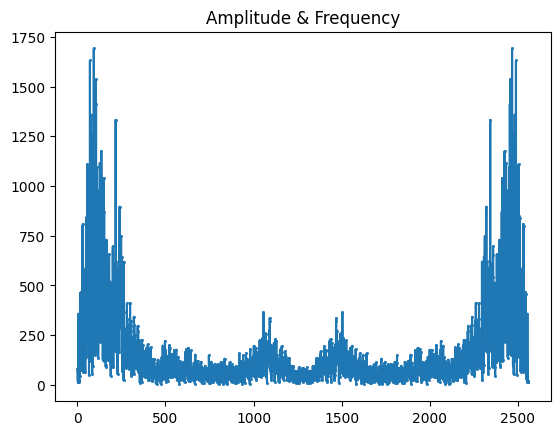

In [ ]:
x = pd.read_csv(f'{FEMTO}/Bearing1_1/{accs[0]}',header=None,sep=',', usecols=[4])
fft_result = np.fft.fft(x, axis=0)
N = len(fft_result)
frequencies = np.fft.fftfreq(N)  # 采样频率为 2560 Hz

# 计算频谱幅值
amplitudes = np.abs(fft_result)
p17 = np.sum(amplitudes) / N
p18 = np.sum(frequencies * amplitudes) / np.sum(amplitudes)
p19 = (np.sum(frequencies ** 2 * amplitudes) / np.sum(amplitudes)) ** 0.5
p20 = ((np.sum((frequencies - p18) ** 2 * amplitudes)) / np.sum(amplitudes)) ** 0.5
print(p17)
print(p18)
print(p19)
print(p20)
# 绘制频谱图
import matplotlib.pyplot as plt

# plt.plot(frequencies, amplitudes)
# plt.plot(frequencies, label='Pred', marker='o', markersize=1)
plt.plot(amplitudes, label='Y', marker='s', markersize=1)
# plt.title('Amplitude')
# plt.title('Frequency')
plt.title('Amplitude & Frequency')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
plt.show()

In [14]:
f17 = []
f18 = []
f19 = []
f20 = []
amplitude_list = []
frequency_list = []

In [15]:
N = 2560
for i in range(life):
    x = pd.read_csv(f'{FEMTO}/Bearing1_1/{accs[i]}',header=None,sep=',', usecols=[4])
    fft_result = np.fft.fft(x, axis=0)
    frequencies = np.fft.fftfreq(N, d=1/25600)  # 采样频率为 2560 Hz
    frequency_list.append(frequencies)
    # 计算频谱幅值
    amplitudes = np.abs(fft_result)
    amplitude_list.append(amplitudes)
    p17 = np.sum(amplitudes) / N
    p18 = np.sum(frequencies * amplitudes) / np.sum(amplitudes)
    p19 = (np.sum(frequencies ** 2 * amplitudes) / np.sum(amplitudes)) ** 0.5
    p20 = ((np.sum((frequencies - p18) ** 2 * amplitudes)) / np.sum(amplitudes)) ** 0.5
    f17.append(p17)
    f18.append(p18)
    f19.append(p19)
    f20.append(p20)

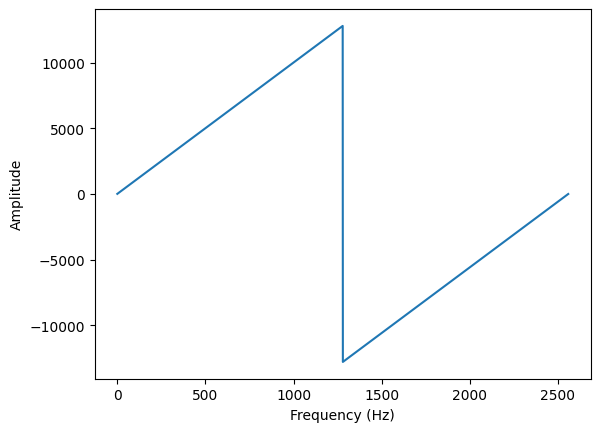

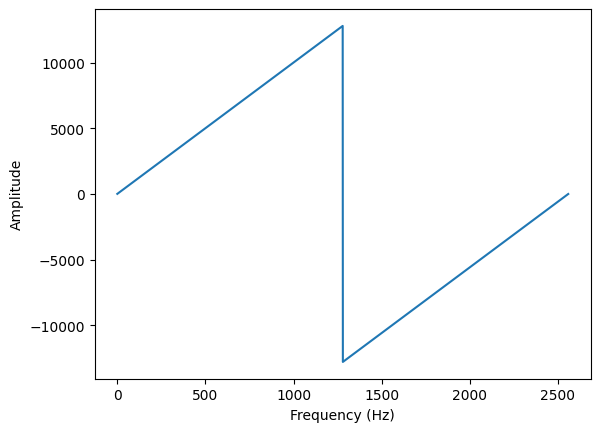

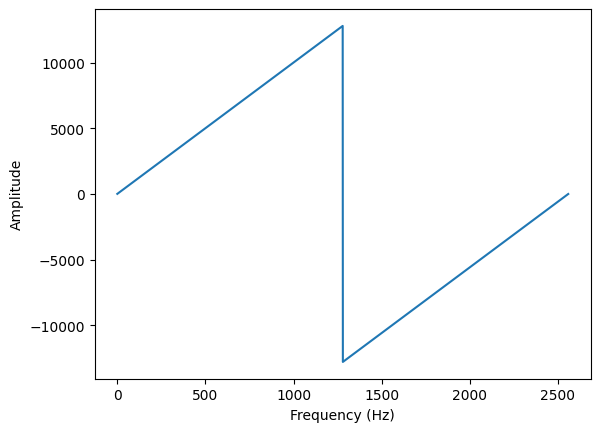

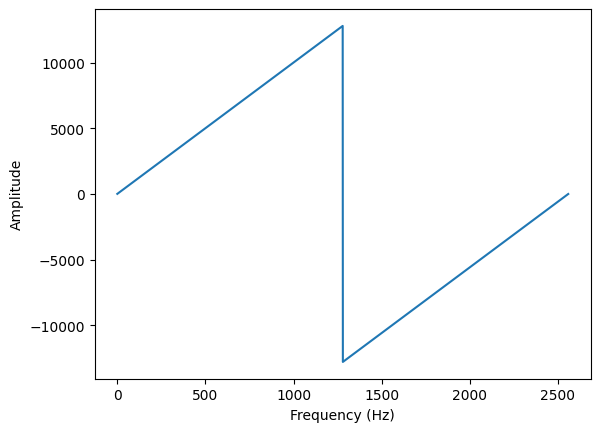

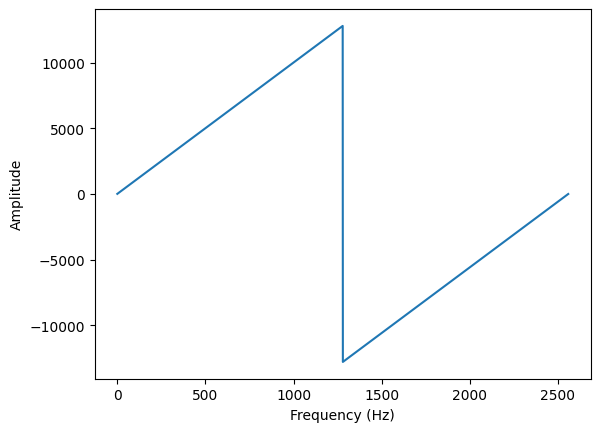

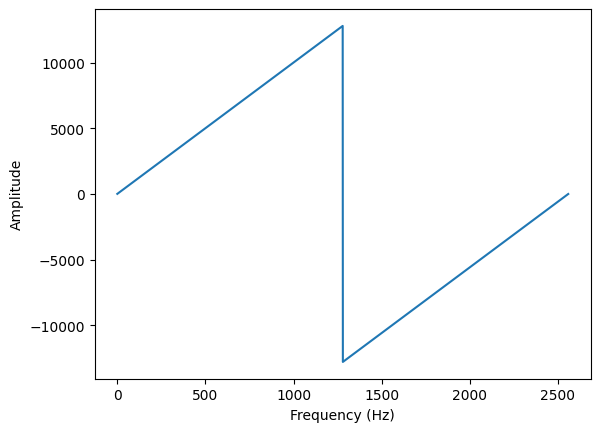

In [16]:
for i in [0, 500, 1000, 1500, 2000, 2500]:
    plt.plot(frequency_list[i])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()

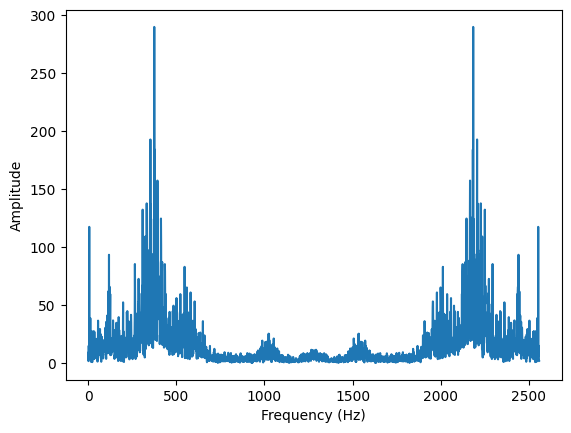

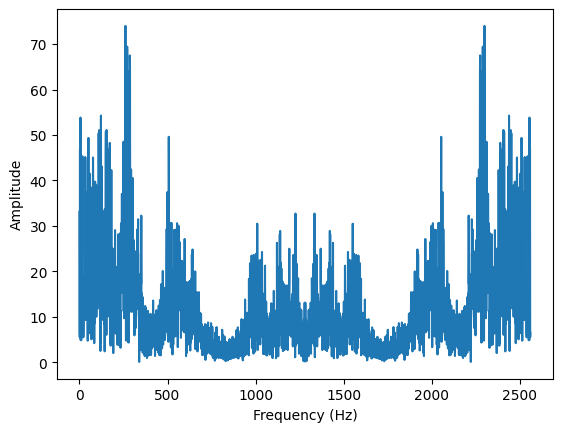

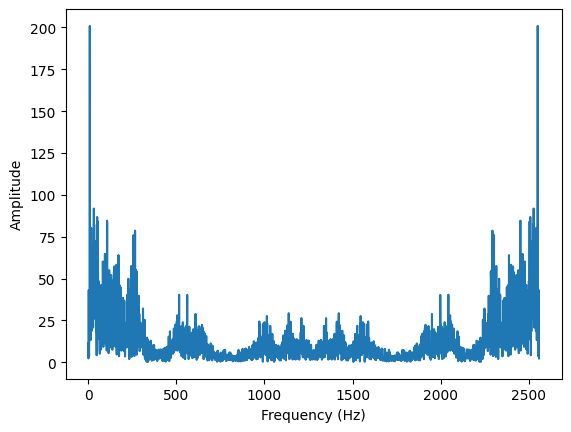

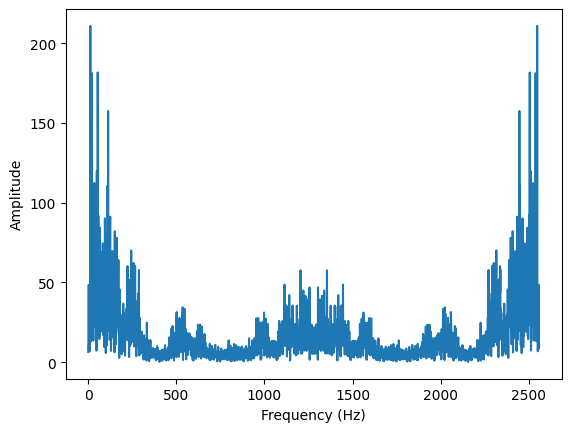

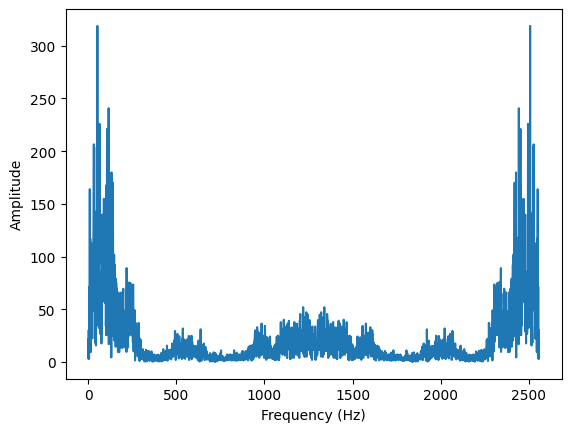

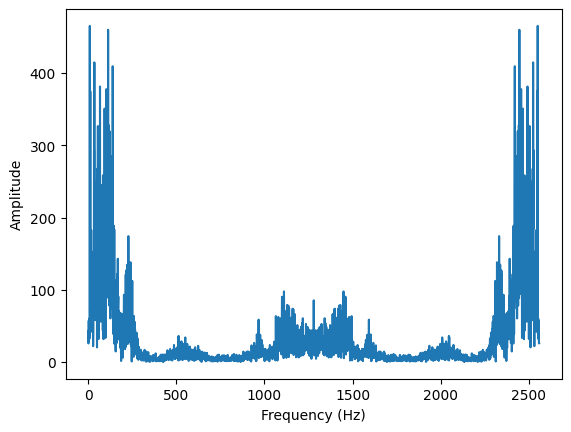

In [13]:
for i in [0, 500, 1000, 1500, 2000, 2500]:
    plt.plot(amplitude_list[i])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()

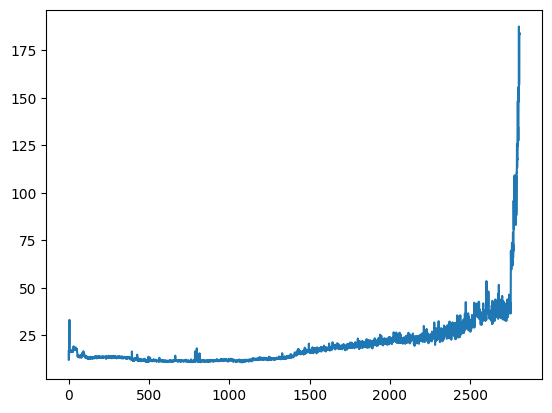

In [11]:
plt.plot(f17)
plt.show()

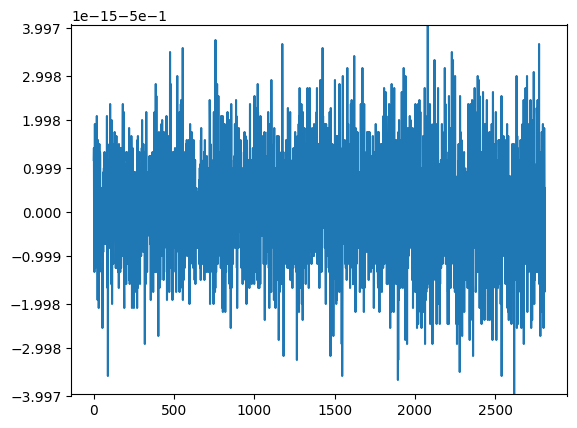

In [12]:
plt.plot(f18)
# plt.yticks([])
plt.ylim(min(f18), max(f18))
plt.show()

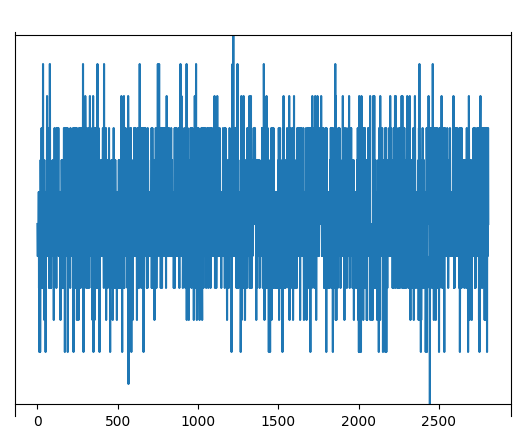

In [13]:
plt.plot(f19)
# plt.yticks([])
plt.ylim(min(f19), max(f19))
plt.show()

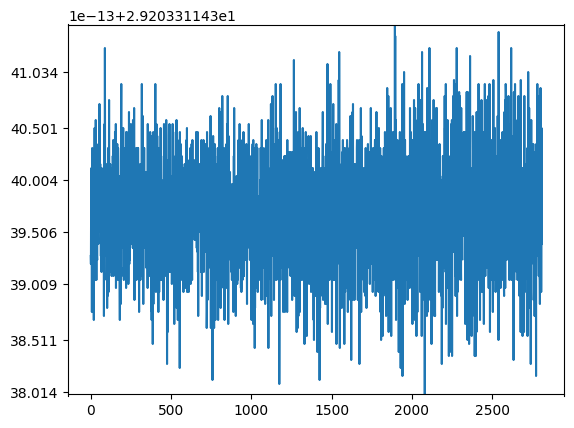

In [14]:
plt.plot(f20)
# plt.yticks([])
plt.ylim(min(f20), max(f20))
plt.show()

In [ ]:
fft_result = np.fft.fft(x.to_numpy())
N = len(fft_result)
frequencies = np.fft.fftfreq(N, d=1)  # 采样频率为 2560 Hz

# 计算频谱幅值
amplitudes = np.abs(fft_result)
p17 = np.sum(amplitudes) / N
p18 = np.sum(frequencies * amplitudes) / np.sum(amplitudes)
p19 = (np.sum(frequencies ** 2 * amplitudes) / np.sum(amplitudes)) ** 0.5
p20 = ((np.sum((frequencies - p18) ** 2 * amplitudes)) / np.sum(amplitudes)) ** 0.5
print(p17)
print(p18)
print(p19)
print(p20)
# 绘制频谱图
import matplotlib.pyplot as plt

plt.plot(frequencies)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()